# Homework 3: Text mining

This assignment will teach you how to use text data to build predictive models. The data for this assignment is in the file "tweets.csv".

## Backgroud of the dataset
The dataset you're referring to is a sentiment analysis dataset that focuses on the problems associated with major U.S. airlines. Here are some key details about this dataset:

- Source: The original data came from Crowdflower's Data for Everyone library. This library is a collection of datasets made available for public use.

- Data Collection Period: The Twitter data used in this sentiment analysis was scraped from February of 2015. This means that the tweets in this dataset were posted on Twitter during that specific time period.

- Task Description: Contributors were tasked with performing two main classifications on the tweets. First, they were asked to classify each tweet into one of three sentiment categories: positive, negative, or neutral. Second, for tweets categorized as negative, contributors were further asked to categorize the specific reasons for the negativity. Examples of negative reasons could include "late flight" or "rude service". 

- Airlines Covered: The dataset covers six major U.S. airlines. These airlines are not specified in the provided information, but they would likely include carriers like American Airlines, Delta, United, Southwest, and others.

## Dataset and Task for this assignment
- The dataset: "tweets.csv" only contains the tweets for Tans-American Airlines(TAA)
- Business backgroud: 

TAA’s management has recently noticed that customers are highly dissatisfied with TAA’s customer service centers. In response, you were hired to analyze Twitter data and detect when a customer has problems with TAA's customer service centers. Each day, the top 20 tweets with the highest probability of being related to customer service issues should be sent directly to the managers of the customer service centers. 
There are 14,640 tweets with different sentiments (positive, neutral, negative), and if negative, the "negativereason" is stated. The tweets labeled "Customer Service Issue" are the ones TAA considered to be related to customer service centers. 

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,name,retweet_count,text,tweet_created,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,cairdin,0,@TAA What @dhepburn said.,2/24/2015 11:35,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,jnardino,0,@TAA plus you've added commercials to the expe...,2/24/2015 11:15,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,yvonnalynn,0,@TAA I didn't today... Must mean I need to tak...,2/24/2015 11:15,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,jnardino,0,@TAA it's really aggressive to blast obnoxious...,2/24/2015 11:15,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,jnardino,0,@TAA and it's a really big bad thing about it,2/24/2015 11:14,Pacific Time (US & Canada)


In [2]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'name', 'retweet_count',
       'text', 'tweet_created', 'user_timezone'],
      dtype='object')

## Question 1: Target Variable

According to the case study, what should be the target variable that we should predict to address the problem discussed in the case study. Explain your choice of target variable, and set the target variable in the following code cell

In [3]:
# set your target variable, make sure the target varialbe should be in a format of 0s and 1s 
# where 1 should represent the outcome of interest (e.g., the customer is angry).

# get the relavant column in NumPy format
y = df['negativereason'].to_numpy().astype('str')

# print all possible values for the negative reason column
print("Unique values in negative reason column:")
print(np.unique(y))

# create the required column
y = (y == 'Customer Service Issue') * 1
print("y.shape: ", y.shape)

# brief check of correctness of code
print("Check that y indexes the correct rows:")
df['negativereason'][y == 1]

Unique values in negative reason column:
['Bad Flight' "Can't Tell" 'Cancelled Flight' 'Customer Service Issue'
 'Damaged Luggage' 'Flight Attendant Complaints' 'Flight Booking Problems'
 'Late Flight' 'Lost Luggage' 'longlines' 'nan']
y.shape:  (14640,)
Check that y indexes the correct rows:


24       Customer Service Issue
25       Customer Service Issue
32       Customer Service Issue
33       Customer Service Issue
39       Customer Service Issue
                  ...          
14620    Customer Service Issue
14621    Customer Service Issue
14629    Customer Service Issue
14636    Customer Service Issue
14638    Customer Service Issue
Name: negativereason, Length: 2910, dtype: object

<font color='red'>
According to the problem description,
<br>
<p>
<font color='gray'><i>
The top 20 tweets with the highest probability of being related to customer service issues should be sent ... the tweets labeled "Customer Service Issue" are the ones TAA considered to be related to customer service centers. 
</i></font>
</p>
So we are tasked to build a model capable of predicting whether or not a tweet is related to customer service issues.  This can be done by taking the "negative reason" column in the dataframe, and finding which entries of it corresponds to customer service issues.  The line

<font color='black'><pre>y = (y == 'Customer Service Issue') * 1</pre></font>
is used to turn the boolean array into an array with 0s and 1s, where 1 means that row is related to customer service issues.
</font>

## Question 2: Building Predictive Models

The following code splits the data into a training set (13,640 tweets) and a holdout set (1,000 tweets). It then transforms the text of each tweet using the bag-of-words technique. Each possible word that could appear in a tweet is represented as a binary feature that takes a value of 1 if the word is present in the tweet and a value of 0 otherwise. 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

text_data = df['text']
text_train, text_holdout, y_train, y_holdout = train_test_split(text_data, y, test_size=1000, random_state=0)
binary_vectorizer = CountVectorizer(binary=True)
binary_vectorizer.fit(text_train)
X_binary_train = binary_vectorizer.transform(text_train)
X_binary_holdout = binary_vectorizer.transform(text_holdout)
X_binary_train.shape, X_binary_holdout.shape

((13640, 14436), (1000, 14436))

In [5]:
text_train.shape # (13640,)
text_holdout.shape # (1000,)
y_train.shape # (13640,)
y_holdout.shape # (1000,)

(1000,)

As you can see, the matrix that results from transforming the text in the training data consists of 13,640 rows (tweets) and 14,436 features (words)! The output above also shows that the data is being stored in a sparse matrix (as opposed to the typical dense matrix). Given the shape of the matrix, this means there are \~197 million cells that should have values. However, from the above, we can see that only \~218k cells (\~0.1% of the cells) have values! Why is this?

To save space, sklearn uses a sparse matrix. This means that only values that are not zero are stored, which saves a ton of memory and makes the computation of models much more efficient!

## Build a Multinomial Naive Bayes model use training data 
You can use GridSearchCV with 10 folds to try different alpha (Additive (Laplace/Lidstone) smoothing parameter) to find out the best alpha, use AUC as score method. Report the test Accuracy, classification report and AUC for this Multinomial Naive Byes.

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': array([1.23409804e-04, 1.24613059e-04, 1.25828046e-04, 1.27054879e-04,
       1.28293673e-04, 1.29544546e-04, 1.30807615e-04, 1.32082999e-04,
       1.33370819e-04, 1.34671194e-04, 1.35984248e-04, 1.37310105e-04,
       1.38648889e-04, 1.40000726e-04, 1.41365744e-04, 1.42744070e-04,
       1.44135836e-04, 1.45541171e-04, 1.469602...
       1.59996480e+00, 1.61556458e+00, 1.63131645e+00, 1.64722191e+00,
       1.66328245e+00, 1.67949958e+00, 1.69587483e+00, 1.71240973e+00,
       1.72910586e+00, 1.74596477e+00, 1.76298806e+00, 1.78017733e+00,
       1.79753419e+00, 1.81506028e+00, 1.83275726e+00, 1.85062678e+00,
       1.86867053e+00, 1.88689021e+00, 1.90528753e+00, 1.92386422e+00,
       1.94262205e+00, 1.96156276e+00, 1.98068814e+00, 2.00000000e+00])},
             scoring='roc_auc')

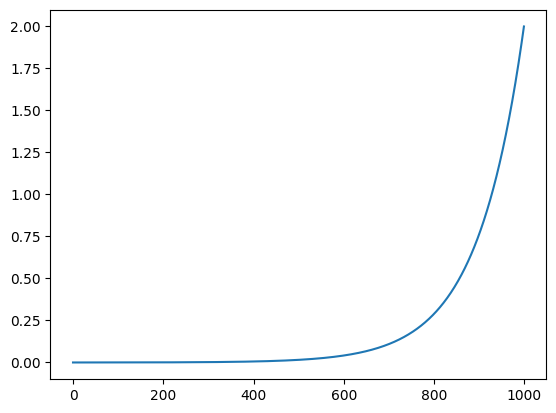

In [7]:
# Write the code to find the best alpha for Multinomial Naive Bayes model, using GridSearchCV
import matplotlib.pyplot as plt

# create the range to search over
values = np.exp(np.linspace(-9, np.log(2), 1000))
plt.plot(values)

# create searcher object
searcher = GridSearchCV(MultinomialNB(), {'alpha': values}, cv=10, scoring='roc_auc')
searcher.fit(X_binary_train, y_train)

The best alpha is 0.329
Accuracy: 0.8314
AUC: 0.8458
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     10929
           1       0.80      0.83      0.82      2711

    accuracy                           0.93     13640
   macro avg       0.88      0.89      0.88     13640
weighted avg       0.93      0.93      0.93     13640



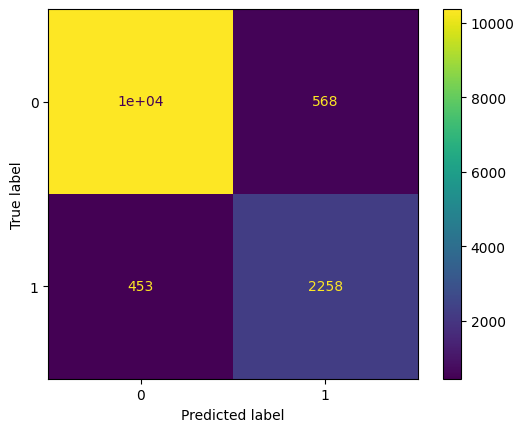

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# get best estimator
print(f"The best alpha is {searcher.best_params_['alpha']:.4g}")
best_alpha = searcher.best_params_['alpha']
model = searcher.best_estimator_

# print out the best estimator's accuracy, auc and show the classification report
print(f"Accuracy: {cross_val_score(model, X_binary_train, y_train, scoring='accuracy', cv=10).mean():.4g}")
print(f"AUC: {cross_val_score(model, X_binary_train, y_train, scoring='roc_auc', cv=10).mean():.4g}")
print(f"Classification report: ") 
print(classification_report(y_pred=model.predict(X_binary_train), y_true=y_train))
ConfusionMatrixDisplay.from_estimator(model, X=X_binary_train, y=y_train)

### Test the Multinomial Naive Bayes model on the hold out testing set
Report the performance result, including accuracy, precision, recall, confusion matrix and AUC
How do you evaluate the testing result?

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

Accuracy: 0.854
AUC: 0.7521
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       801
           1       0.65      0.58      0.61       199

    accuracy                           0.85      1000
   macro avg       0.77      0.75      0.76      1000
weighted avg       0.85      0.85      0.85      1000



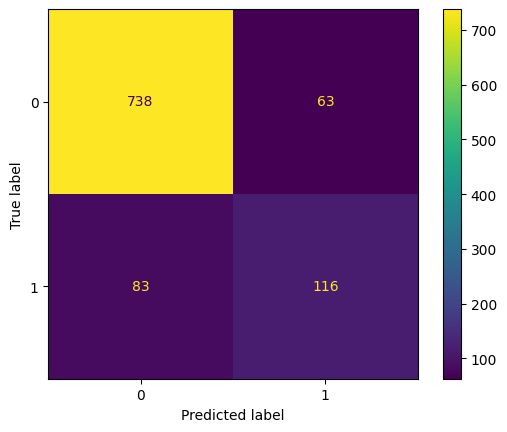

In [10]:
# your codes go here
y_pred = model.predict(X_binary_holdout)
print(f"Accuracy: {accuracy_score(y_holdout, y_pred):.4g}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_holdout, y_pred)).plot()
print(f"AUC: {roc_auc_score(y_holdout, y_pred):.4g}")
print(classification_report(y_holdout, y_pred))

In [20]:
A = confusion_matrix(y_train, model.predict(X_binary_train))
B = confusion_matrix(y_holdout, model.predict(X_binary_holdout))
print(A) 
print(B) 
print(A[0, 0] / A[1, 1])
print(B[0, 0] / B[1, 1])

[[10361   568]
 [  453  2258]]
[[738  63]
 [ 83 116]]
4.588573959255979
6.362068965517241


<font color='red'>
The accuracy, false labels prediction, false labels recall and false labels F1 score performed similar to the cross-validation testing results.  However, we see a slight drop for the precision, recall and F1 score for the true label.

<br>

One idea for the cause would be due to the different proportion of true labels in the testing set compared to the training set, but comparing the the number of true labels in the testing set (199 out of 1000) to that of the training set (2711 out of 13640), we see that both values are roughly 20%.  This means the difference in precision is not due to bias when splitting the training and testing set.

When looking at the confusion matrix, the issue seems to be because of the increased number of false positives and false negatives.  Also, although the accuracy has remained around 80%, we see that the proportion of "true negatives" to "true positives" has risen from 4.5x to 6.36x.  This means the model predicts much more "negative" in the testing set compred to the training set.  This may be because for the Naive Bayes model, its prediction is based on the number of samples observed in the training set.  Since the model has never seen the testing set, we may encounter a zero-frequency problem.  Even though we used smoothing, since smoothing just adds an equal constant to all the occurences, the probability of those "zero frequency" samples will still be low compared to others, which results in a "negative" prediction.  This may explain the drop in the precision, recall and F1 score for the true label.
</font>

## Build a Logistic Regression model use training data 
You can use GridSearchCV with 10-fold to try different C (L1 regularization strangth parameter) to find out the best C. Use the parameters solver="liblinear" and set AUC as score method. Report the test Accuracy, classification report and AUC for this Logistic Regression Model.

In [21]:
from sklearn.linear_model import LogisticRegression

GridSearchCV(cv=10,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.23409804e-04, 1.36104250e-04, 1.50104499e-04, 1.65544872e-04,
       1.82573507e-04, 2.01353777e-04, 2.22065864e-04, 2.44908483e-04,
       2.70100788e-04, 2.97884479e-04, 3.28526115e-04, 3.62319678e-04,
       3.99589388e-04, 4.40692814e-04, 4.86024310e-04, 5.36018793e-04,
       5.9115...
       2.10389206e-01, 2.32030714e-01, 2.55898359e-01, 2.82221129e-01,
       3.11251568e-01, 3.43268199e-01, 3.78578194e-01, 4.17520322e-01,
       4.60468199e-01, 5.07833873e-01, 5.60071778e-01, 6.17683091e-01,
       6.81220544e-01, 7.51293722e-01, 8.28574920e-01, 9.13805583e-01,
       1.00780343e+00, 1.11147028e+00, 1.22580074e+00, 1.35189170e+00,
       1.49095290e+00, 1.64431852e+00, 1.81345996e+00, 2.00000000e+00])},
             scoring='roc_auc')

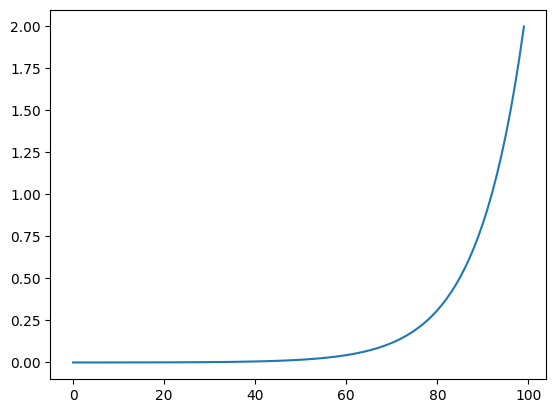

In [82]:
# Write the code to find the best C (L1) for Logistic Regression model, using GridSearchCV

# create the range to search over (code takes too long to run on my slow computer so only try 10 values for now, 10 values takes 1min42sec)
values_2 = np.exp(np.linspace(-9, np.log(2), 100))
plt.plot(values_2)

# create searcher object
searcher = GridSearchCV(LogisticRegression(penalty ='l1', solver="liblinear"), {'C': values_2}, cv=10, scoring='roc_auc')
searcher.fit(X_binary_train, y_train)

0.011854420028129461


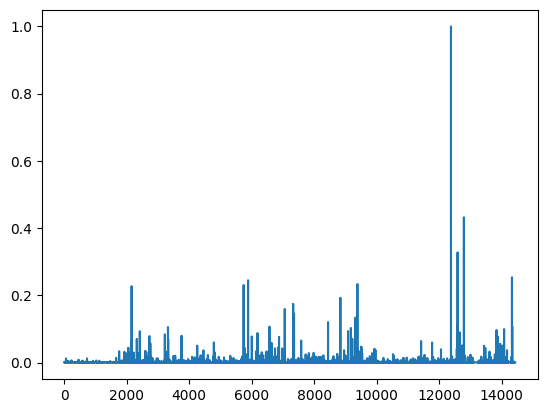

In [46]:
# technically, we should perform normalization before using L1 regularization, 
# but since the data is so sparse, the likelihood of coefficients being dropped purely due to different scales between
# two columns is very low.  The code below attemps to justify this decision by 
# showing the mean of each word over all tweets, and the SD between all the means.
# In any case, we have done normalization since assignment 1 already, so it wouldn't make sense to have it as a grading criterion again and again???
# Code for normalization is provided just in case:
# X_binary_train_normalized = (X_binary_train - X_binary_train.mean(axis=0)) / X_binary_train.std(axis=0)
plt.plot(np.array(X_binary_train.mean(axis=0)).reshape(-1)) # the matrix is sparse, taking mean over all tweets (axis=0) generally gives a very low number
print(X_binary_train.mean(axis=0).std()) # a low SD

The best C is 0.4175
Accuracy: 0.8707
AUC: 0.8751
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     10929
           1       0.82      0.56      0.66      2711

    accuracy                           0.89     13640
   macro avg       0.86      0.76      0.80     13640
weighted avg       0.88      0.89      0.88     13640



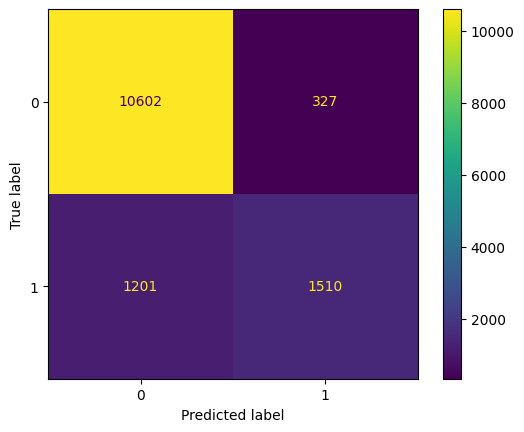

In [84]:
# get best estimator
print(f"The best C is {searcher.best_params_['C']:.4g}")
best_C = searcher.best_params_['C']
model_logistic = searcher.best_estimator_

# print out the best estimator's accuracy, auc and show the classification report
print(f"Accuracy: {cross_val_score(model_logistic, X_binary_train, y_train, scoring='accuracy', cv=10).mean():.4g}")
print(f"AUC: {cross_val_score(model_logistic, X_binary_train, y_train, scoring='roc_auc', cv=10).mean():.4g}")
print(f"Classification report: ") 
print(classification_report(y_pred=model_logistic.predict(X_binary_train), y_true=y_train))
ConfusionMatrixDisplay.from_estimator(model_logistic, X=X_binary_train, y=y_train)

### Test the Logistic Regression model on the hold out testing set
Report the performance result, including accuracy, precision, recall, confusion matrix and AUC
How do you evaluate the testing result? and how do you compare the performance of logistic regression model with the previous Naive Bayes Model?

Accuracy: 0.849
AUC: 0.7112
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       801
           1       0.67      0.48      0.56       199

    accuracy                           0.85      1000
   macro avg       0.77      0.71      0.73      1000
weighted avg       0.84      0.85      0.84      1000



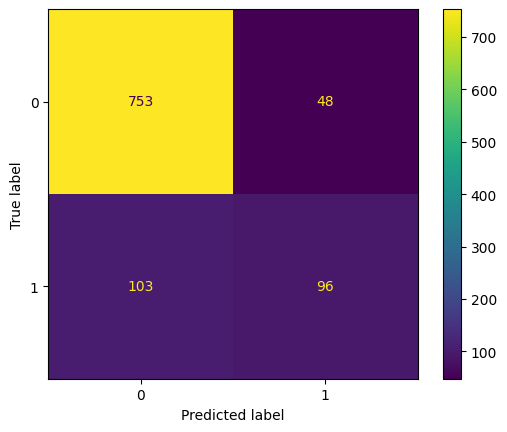

In [85]:
# your codes go here
y_pred = model_logistic.predict(X_binary_holdout)
print(f"Accuracy: {accuracy_score(y_holdout, y_pred):.4g}")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_holdout, y_pred)).plot()
print(f"AUC: {roc_auc_score(y_holdout, y_pred):.4g}")
print(classification_report(y_holdout, y_pred))

<font color='red'>
When evaluating the testing results, we find the accuracy on the training set is similar to that on the testing set, indicating that over-fitting is not likely.  The true label's precision, recall and F1 score sees a similar drop as in the Naive Bayes model, for the same reasons as stated above.

<br>

When comparing the logistic regression model to the Naive Bayes model, both models perform quite similarly across all metrics.  The confusion matrix also has similar distributions in the cells.  In practice, the logistic regression model would have the advantage of computing the answer faster, as we just need to plug in the formula 

$$
f(x)=\frac{1}{1+e^{-(a_0 + a_1x_1 +\cdots + a_{14436}x_{14436})}}
$$

and compare the output with the threshold to get the prediction.  However, the Naive Bayes model would have the advantage of being able to update its predictions faster in response to new evidence.


Since the case study just wants TAA's management to know the top 20 tweets with the highest probablility every day, there is no urgency so both models can do the job.

</font>

## Question 3: Most Predictive Words 

The code below shows the features with the largest coefficients in your logistic regression model. Use it to show the most predictive words. Pick a few words that catch your attention (at least 2 or 3). Why do you think these words are predictive? 

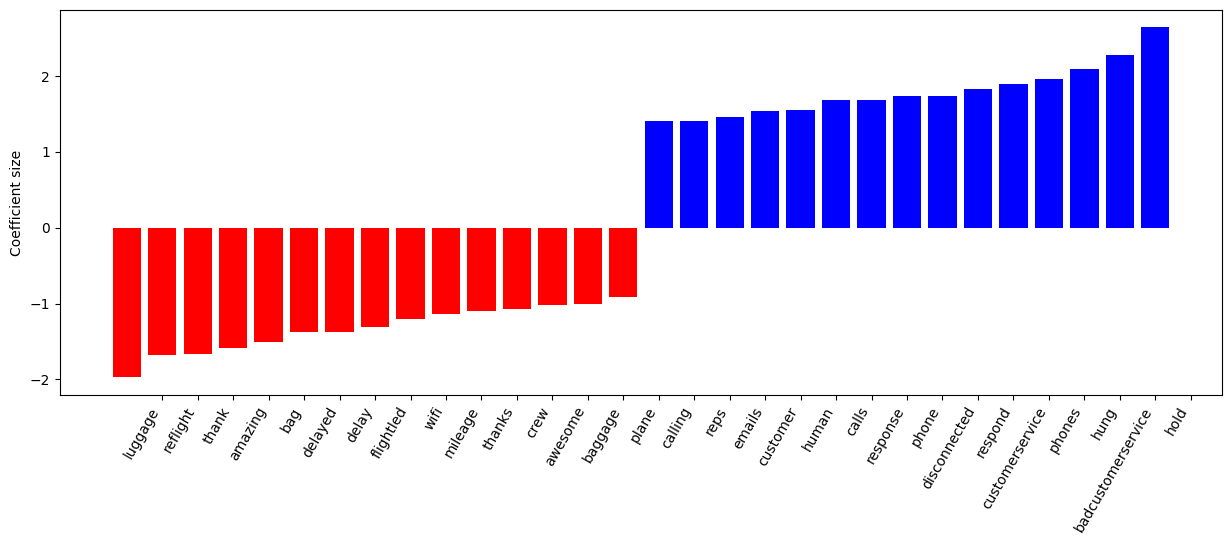

In [86]:
import numpy as np
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=15):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha="right")
    plt.ylabel("Coefficient size")
    plt.show()
    
feature_names = binary_vectorizer.get_feature_names_out()
plot_coefficients(model_logistic, feature_names) #<--remember to change "my_model" to the model name your logistic regression  

In [150]:
a = LogisticRegression(penalty=None, fit_intercept=True)
a.fit(X=[[0], [0], [1]], y=[0, 0, 1])
a.intercept_, a.coef_
a.predict_proba([[0]]), 1/(1+np.e**-((a.intercept_ + 0* a.coef_)))

(array([[9.99951761e-01, 4.82388580e-05]]), array([[4.8238858e-05]]))

<font color='red'>

The red bars indicates negative coefficients, which means that the appearance of these words decreases the chance that the tweet is classified as "customer service related".  The blue bars indicates positive coefficients, which means the appearance of these words increases the chance the tweet is classified as "customer service related".

Words like "thank", "amazing" being on the red side makes sense, because those tweets probably have positive sentiment.  Words like "delay" or "delayed" being on the red side also makes sense, because customers are probably complaining about delayed flights, not customer service.

For the blue side, we see that a lot of the words that appear make sense: "ignoring", "phone", "emails", "disconnected", "hung", "hold".  Probably, the customers are complaining that they sent multiple emails and phone called the airline and got ignored.  Customers were also stuck waiting on the line for a long time (hold), and likely got forcefully hung up by the other side without reason (disconnected, hold).  It shows that the model seems to be able to pick out words that are related to customer service issues.

</font>

## Question 4: Text Mining Limitations

For the purposes of this question, suppose we use a threshold of 0.5 to predict the target variable. The following code prints the text of five false positives and five false negatives in the test set. Why do you think the model made these mistakes? Please use logsitc regression model you build before for this question

In [87]:
predictions = model_logistic.predict(X_binary_holdout) #<--remember to change "my_model" to the model name your logistic regression
false_positives = text_holdout[(predictions == 1) & (y_holdout == 0)]
false_negatives = text_holdout[(predictions == 0) & (y_holdout == 1)]
print("===== FALSE POSITIVES")
print(false_positives.head(5).values)
print("===== FALSE NEGATIVES")
print(false_negatives.head(5).values)

===== FALSE POSITIVES
["@TAA In car gng to DFW. Pulled over 1hr ago - very icy roads. On-hold with AA since 1hr. Can't reach arpt for AA2450. Wat 2 do?"
 '@TAA yes. It says bag is being delivered. The local number says Not Open. Asked main # for cust service got hung up on.'
 '@TAA u r horrible.went online to Cancelled Flight flight-no button-4that.Called CS &amp;wait time 40 mins&amp;put in my #.800#called&amp;it hungupNOHELP'
 '@TAA Can you find us a flt out of LAX that is sooner than midnight on Monday? That would be great customer service 😃'
 "@TAA 245. I'm about to take off but one of your reps at a different gate was rude when I asked for assistance. Thanks, though."]
===== FALSE NEGATIVES
['@TAA still no response from AA. great job guys!'
 '@TAA hello??? Anyone there?'
 "@TAA Didn't see travel had to be compete for unused funds by expiration date hidden in the fine print. Never saw that before."
 '@TAA awesome... Doors close in 2 minutes, flight leaves in 17 minutes... And the p

<font color='red'>

For the false positive cases, the model wrongly predicted positive likely because of some key words in the tweets.  For example, the words "hold", "hung", "customer" and "service".  However, some of these tweets are complaining about baggage and cancelled flights, which may not directly have anything to do with customer service.

For the false negative cases, tweets like the second one (hello??? Anyone there?) does not have enough context, and maybe is a reply to a previous tweet.  Without context, it is hard for the model to predict accurately.  The first tweet might be a typo from the twitter user, as the user tagged @TAA but mentions AA in the tweet instead.  Most false negative tweets seem to also be shorter in length, so if we were to believe that the dataset is labelled properly, then probably context plays a huge role in determining if the tweet is customer service related or not (but this information is unavailable to the logistic model).

The method we used to label the X-variable also doesn't take into account multiple appearances of a word.  Even if one word appears multiple times in the tweet, we still only put a "1" instead of the number of times.  This means during training, the logistic model is unable to take into account multiple appearances to boost the coefficients of certain words.  Also, count vectorizer does not take into account words that have multiple forms.  For example, "hung" and "hang" should intuitively be similar words, but are treated as two different words in the count vectorizer.  If multiple forms of a word appears frequently in the dataset, it would be better to group them together and give the grouped "word" a large coefficient, instead of splitting the magnitude of the coefficient across the similar words.

Possible solutions could be to make use of a better tokenizer, or use a Word2Vec layer before passing to the logistic model.  A Word2Vec layer will help solve the issue of similar forms of a word having different representations ("hung" and "hang"), as the fixed-length vector produced from the Word2Vec model would be similar for both "hang" and "hung" (similar in the p-norm sense), allowing the logistic regression model to recognise them equally.  Of course, the downside is training a Word2Vec model requires HUGE amounts of GPU RAM, although it is possible to make use of pre-trained Word2Vec layers.  Since Word2Vec layers are essentially linear transformations and we are dealing with finite dimensional vector spaces, they are differentiable and will work well with gradient-descent based optimizers (on infinite dimensional vector spaces there are unbounded (ie discountinuous) linear functions).  

Convolution layers are another technique used in text analysis as their kernels make use of words adjacent to the target word, and this helps capture context better than a plain count vectorizer and logistic regression model (which is basically nothing more than a linear layer with sigmoid activation, so the representation power of the logistic model is comparatively less effecitive).

The dataset also seems to be labelled poorly.  The fourth tweet in false negative (awesome... Doors close in 2 minutes, flight leaves in 17 minutes... And the plane just got here. WTH?) seems unrelated to customer service, but it is labelled as being related.  The fourth tweet in false positive also seems to be related to customer service, but is labelled as not related.  Possible reasons may be a low salary paid to the PhD student responsible for labelling the dataset.

</font>

## Question 5: Using the model

Print the top 20 tweets in the holdout set with the highest probability of having a positive value for the target variable. How do you evaluate the result? how do you compare this with majoirty classifier?

In [138]:
probabilities = model_logistic.predict_proba(X_binary_holdout)[:, 1]


# sort probabilies from highest to lowest, and get corresponding tweets and their true labels
idx = np.argsort(probabilities)[::-1]
tweet = text_holdout.values.astype('str')[idx][0:20]
probit = probabilities[idx][0:20]
label = y_holdout[idx][0:20]

# print out result
print("Pr    |Lbl| Tweet")
print("----------------------------------------------------")
for i in range(0, 20):
	print(f"{probit[i]:.3f} | {label[i]} | {tweet[i]}")

# find which class appears the most (majority classifier)
proportion = (y_holdout.sum()+y_train.sum()) /(y_holdout.shape[0] + y_train.shape[0])
majority = "Customer service related" if proportion > 0.5 else "Not customer service related"
print(f"Majority class: {majority}, {1-proportion:.3g}")

# # TestResult = y_holdout.to_frame()
# # TestResult['ProbabilityOfCSI'] = probabilities
# # # This code shows the predictions for the top 20 tweets most likely to be Customer Service Issue related 
# # # (according to the model) and whether they actually Customer Service Issue.
# # Top20 = TestResult.sort_values('ProbabilityOfCSI', ascending=False)[:20]
# # Top20

Pr    |Lbl| Tweet
----------------------------------------------------
1.000 | 1 | @TAA was wondering is there a reason why customer service is so busy? Been on hold past few days for many hours No answer Help plz
0.999 | 1 | @TAA I have been on hold w/customer service line for 68 minutes.  This after I was on phone with an agent for 35 min b/f call droped
0.999 | 1 | @TAA I waited customer service 32 minutes on the phone w/o response. Had to hung up in the end since my battery died due to waiting!
0.999 | 1 | @TAA Hold for 15 min, a couple of rings, then "mailbox has not been set up yet." Customer service forwarding to their cell phones? C'mon
0.997 | 1 | @TAA I'm really glad I just waited on the phone for over an hour to be sent to a voicemail. Your customer service sucks. Nothing has been
0.994 | 0 | @TAA thanks for the reply, something is off with the phones becuz after 2 dropped calls at 2 hours on hold, I got through on 1 ring
0.992 | 1 | @TAA Why offer automated call back option

<font color='red'>
It seems the result is quite accurate (up to the quality of the dataset).  Only 3 out of the top 20 tweets are classified wrongly.  Within those 3 wrongly classified tweets, it seems to make sense why the model would predict them as positive.  The first wrongly classified tweet had the words "hold", "ring" and "call", which the model might think is a complaint, when in reality the customer did indeed get through the call.  The third wrongly classified tweet had the words "disappointed" and "hold", which may cause the model to predict it as a customer service issue.  In reality, the customer is talking about holding the price for the ticket.

Compared to the majority classifer, it is aleady an improvement.  Since the majority classifier would predict all tweets to be "unrelated to customer service" (as shown in the last few lines of code, the majority class is "unrelated to customer service"), the accuracy would be close to 80% which may look good in theory, but in reality it would be useless as it wouldn't help the managers pick out tweets related to customer service, which defeats the sole purpose of building this model.
</font>

## Question 6: How many tweets to review each day?
Let us assume that one false positive (models says it is customer service issue but it is actually not) costs 10 dollars and one true positive earns 10 dollars. Given your model output, how would you suggest your boss to make changes about how many tweets to review each day? 

Number of fp (test set): 48
Number of tp (test set): 96
Profit: 480


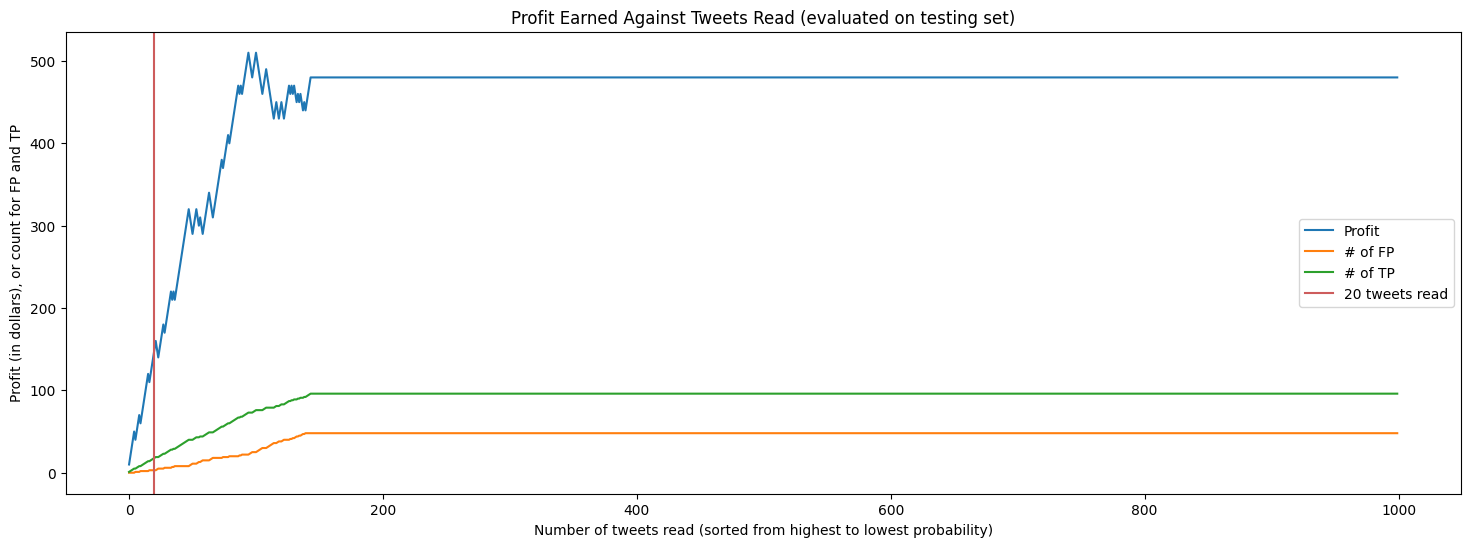

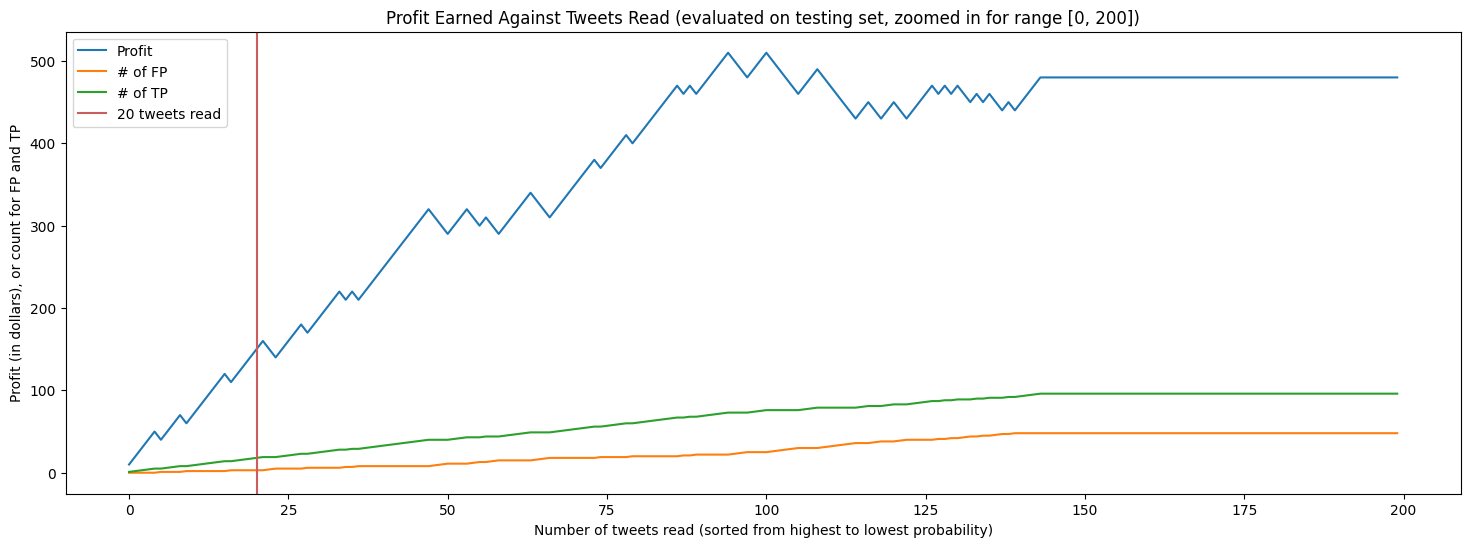

In [139]:
# write your codes here, or you can use excel to complete this question. Please also upload your excel if you choose this option
y_pred = model_logistic.predict(X_binary_holdout)

# get number of true positives and false positives
fp = (y_pred == 1) & (y_holdout == 0)
tp = (y_pred == 1) & (y_holdout == 1)

# print result
print("Number of fp (test set):", fp.sum())
print("Number of tp (test set):", tp.sum())

profit = - (fp.sum() * 10) + (tp.sum() * 10)
print("Profit:", profit)

# find out in the top 20 tweets, how many belong to FP and how many belong to TP
fp_sorted_cumulative = np.cumsum((y_pred[idx] == 1) & (y_holdout[idx] == 0))
tp_sorted_cumulative = np.cumsum((y_pred[idx] == 1) & (y_holdout[idx] == 1))

profit_2 = -(fp_sorted_cumulative * 10) + (tp_sorted_cumulative * 10)

# set figure size, title, axis names and legend
plt.figure(figsize=(18, 6))
plt.title("Profit Earned Against Tweets Read (evaluated on testing set)")
plt.xlabel("Number of tweets read (sorted from highest to lowest probability)")
plt.ylabel("Profit (in dollars), or count for FP and TP")

# add data to graph and show it
plt.plot(profit_2, label="Profit")
plt.plot(fp_sorted_cumulative, label="# of FP")
plt.plot(tp_sorted_cumulative, label="# of TP")
plt.axvline(x=20, color='indianred', label='20 tweets read')
plt.legend(loc="best")
plt.show()

# set figure size, title, axis names and legend
plt.figure(figsize=(18, 6))
plt.title("Profit Earned Against Tweets Read (evaluated on testing set, zoomed in for range [0, 200])")
plt.xlabel("Number of tweets read (sorted from highest to lowest probability)")
plt.ylabel("Profit (in dollars), or count for FP and TP")

# add data to graph and show it
plt.plot(profit_2[0:200], label="Profit")
plt.plot(fp_sorted_cumulative[0:200], label="# of FP")
plt.plot(tp_sorted_cumulative[0:200], label="# of TP")
plt.axvline(x=20, color='indianred', label='20 tweets read')
plt.legend(loc="best")
plt.show()

<font color='red'>
The first half of the code cell finds the profit, if the boss were to read all tweets in the testing set.  The profit amounts to $480. 
But of course, it is not possible for the boss to read all tweets.

<br>

Next, we try to figure out if increasing the number of tweets read will increase profit for the airline agency.  We first make use of the "idx" variable in question 5 (which is the argsorted probabilities array) to sort the TP and FP labels, and use NumPy's cumulative sum formula 
$$
\texttt{cum\_sum[n]} = \sum_{i=0}^n \texttt{a[i]}
$$
to find the profit for each tweet read.  In the displayed graphs, moving from left to right shows the total profit and number of TP / FP cases, given the boss reads all top $x$ tweets.

Based on the graph's information, we see that there is no point for the boss to read more than 150 tweets, as the profit no longer increases.  On the other hand, reading only 20 tweets is clearly not a good choice as the profit is only around $150, and there is much more profit to be gained from reading more tweets.  So I would definitely suggest the boss to read more tweets if possible, while at the same time only providing the boss with the top 15% (calculated from test set size 150/1000) tweets, sorted by decreasing probability.

</font>

## Question 7: Take a look at the top 20 tweets, what seems to be the main problem that Trans-American Airlines is facing?

In [133]:
print(text_holdout.iloc[(-probabilities).argsort()][:20].values)

['@TAA was wondering is there a reason why customer service is so busy? Been on hold past few days for many hours No answer Help plz'
 '@TAA I have been on hold w/customer service line for 68 minutes.  This after I was on phone with an agent for 35 min b/f call droped'
 '@TAA I waited customer service 32 minutes on the phone w/o response. Had to hung up in the end since my battery died due to waiting!'
 '@TAA Hold for 15 min, a couple of rings, then "mailbox has not been set up yet." Customer service forwarding to their cell phones? C\'mon'
 "@TAA I'm really glad I just waited on the phone for over an hour to be sent to a voicemail. Your customer service sucks. Nothing has been"
 '@TAA thanks for the reply, something is off with the phones becuz after 2 dropped calls at 2 hours on hold, I got through on 1 ring'
 '@TAA Why offer automated call back option when agent is available only to call me &amp; have me sit on hold? At 12:30am. #onholdfordays'
 "@TAA how is it possible that you don

<font color='red'>
The tweets generally shows three main issues:

<br> 

1. Long on-hold times
<br>
Some tweets such as "Been on hold with customer service line for 68 minutes" and "On hold 51 minutes and counting" shows that the customer service center is understaffed, causing customers to have to wait a long time to get connected.

2. Dropped calls and disconnections
<br>
Some tweets contained "After 2 dropped calls at 2 hours on hold" and "4 hours on hold call was disconnected".  Not sure why the customer service center would do that, but disconnected calls after waiting on hold for hours will definitely infuriate the customers.

3. Unresponsive "callbacks" / poor automated systems
<br>
Some tweets contained "Why offer automated call back option when agent is available only to call me & have me sit on hold?" and "sent to voicemail", which indicates that the fallback options in case the lines are too busy aren't well-designed.

To solve these issues, the airline company should look into increasing the number of staff employed in call centers (maybe dynamically adjust the number of staff based on the volume of calls, this should be fairly easy to do using data mining), and provide customers with alternatives to calling their call centers (eg handle some issues by email instead of giving the same stock replies every time).  The airline agency may also look into using text-based chatbots to handle basic enquiries, and only direct customers to call centers if the chatbots cannot handle the requests.
</font>